## CA DATA PREPARATION

Student: Beatriz Lobão Silva Sena

Lecturer(s): David McQuaid 


ABSTRACT - The following study is based on the theories of data set characterization, data preparation application, Exploratory Data Analysis and PCA. In this study, data from the focus is the Air Pressure were used in order to analyze the data through python software, thus having greater ability to use the program to carry out the future analyses required in the professional environment.

## Introduction: 
Data preparation for process analysis is extremely important. The dataset that will be analyzed in this process obtained diarios data from heavy Scania trucks. The aim is to analyze how much the air pressure system is responsible for the failures of the trucks. For this it will be necessary to analyze the data in the process leaving only the data that really impacts the goal. Firstly, to do the analise to characterize the dataset, clean the dataset, deal with missing values and outliers. After that apply the PCA. The missing values is when no data value occurs is stored for the variable in a note. Outliers are defined as observations, that is far from the main body that it is a part of. The change of scale is necessary when two variables have distant values. For machine learning, not all datasets require normalization. PCA is a multivariate technique that analyzes a data table. Its goal is to reduce dimensions, extracting only important information from the dataset.

In [1]:
# reading data

In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Firstly, it was necessary to import the libraries that were used for the development of the CA.

The pandas library commonly called "pd" was developed by Wes McKinney in 2008. This is known for rapid interactions, ability to process different types of dataset, ease of importing CSV files, deal with missing values, interacting with other python libraries. In this CA, pd was used to import the data set. "Mastering Pandas"

Numpy working with arrays. The library is known for fast operations on arrays, including mathematical and random simulation. 

Sklearn is robust library. The library was used in this CA , because provides a efficient tools for machine learning and statistical modeling. The PCA (Principal Component Analysis) was import from sklearn and was necessary to reduce the number of columns in this project.

Matplotlib is used to plotting graphs of arrays, creating statical interferences. It is able of dealing with various operating systems,  well connected with Numpy and Pandas. This library is similar to seaborn library, however is more useful when the complexity of the data and the functions is high.

Seaborn is a library for making statistical graphics in Python. The library has high interface to matplotlib. Many seaborn functions can generate figures with multiple panels that provides comparisons between conditional subsets of data. 

In [3]:
airpresistem_df = pd.read_csv("databeatriz/aps_failure_set (1).csv")

At this time it was requested that the panda library read the file that was saved in the folder "databeatriz" in the notebook jupyter.

In [4]:
airpresistem_df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
airpresistem_df.tail(5) 

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


By using the head(5) and tail(5) code, it is possible to view the first five and the last five rows of the data set. However, because it is a data set with 171 columns as indicated, it was not possible to visualize using this code all the entries of these rows. The table displays some entries as "na". These entries are considered missing values.

In [6]:
airpresistem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


By using the .info() function it provides the range of rows starting, as always, from 0 to 59999, totaling 60,000. The number of columns, naming the first and the last. The memory used by the data set, that means, how heavy it is.
However, one detail draws the attention of the data analyst, that is: The number of columns identified as a categorical variables. Only one column is identified as numeric variable. Furthermore, by analyzing the table, as an analyst I can see exactly the other way around. Only one variable would be considered as categorical and the other numerical variables

In [7]:
airpresistem_df.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [8]:
airpresistem_df.shape

(60000, 171)

The shape function shows that the data set at this time contains 60000 rows and 171 columns.

In [9]:
airpresistem_df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In order to confirm that the python was considering numerical variables as categorical, I used the dtypes() function to know what functions the software called categorical and which was the only one that was classified as numerical.  The fact that the data set filled in the missing values as "na" makes the python read these variables as qualitative. However, it should be noted that the column named "aa_000" is identified as "int64", evidencing that it is all filled with numbers, indicating that it is the only column without missing values.

In [10]:
airpresistem_df.count() 

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

The .count() function shows that the columns displayed are all filled. This would be an indication that in these columns there would be no missing values, but what we see is that the missing values were called "na" and and this was considered as qualitative entry in the data set. For this reason it will be necessary to treat the missing values.

In [11]:
print(airpresistem_df.isnull().values.any())

False


By using the isnull().values.any() function to know if there are missing values on the data set, it responds no, proving once again that the python is recognizing the missing values filled as "na" as input. So it is, once again, clear the need to deal with missing values.

In [12]:
duplicate_rows_df = airpresistem_df[airpresistem_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 171)


In order to clean the data frame, the duplicate() function was used. In case of duplicate rows, these rows do not aggregate information to the data set and for a better analysis of the data it would be necessary to drop those rows.  It is extremely important to know if there is repeated information being considered twice in the date set, under consequence of errors in the analysis of the same. However, there are no repeated lines in the analyzed data set, and it is not necessary to cut rows for this reason.

# Dealing with missing values

In [13]:
print('ad_000')
airpresistem_df['ad_000'].head(10)

ad_000


0    280
1     na
2    100
3     66
4    458
5    218
6     na
7    116
8     na
9     na
Name: ad_000, dtype: object

The goal of showing the first ten entries of this variable (ad_000) is the fact that four of them are filled as "na" and after turning those entries into missing values to recheck this column to show that the function worked correctly

In [14]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
airpresistem_df = pd.read_csv("databeatriz/aps_failure_set (1).csv", na_values = missing_value_formats)

print(airpresistem_df['ad_000'].head(10))


0    280.0
1      NaN
2    100.0
3     66.0
4    458.0
5    218.0
6      NaN
7    116.0
8      NaN
9      NaN
Name: ad_000, dtype: float64


I started this substitution by declaring to the program everything he should consider as missing value: "n.a.", "?","NA", "n/a", "na", "--". After that I asked the program to replace all these variations of entries with missing values, and then it puts in the enter the information "NAN" that means not a number. 
To show that the "na" were transformed into missing value, the column (ad_000) was printed again. This time we can realize that the entries that were previously classified as "na" are now NAN.

In [15]:
airpresistem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


After transforming into NAN, I used the .info() function in order to know if the variables previously called qualitative would now be numerical. As expected the result was that only one column was categorical.

In [16]:
airpresistem_df.isnull().values.any()

True

The same previously used function that stated that the data set had no missing values was now used after replacing the values with Not a Number(NaN). This time, the function resulted in the data set having the presence of missing values.

In [17]:
airpresistem_df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

Also using the isnull() function, but this time together with the sum() function the software counted the missing variables in each column. A curiosity is that the "aa_000" column has no missing values. This makes it clear that the variable called as a numeric before the replacement of "na" by NaN was this column.

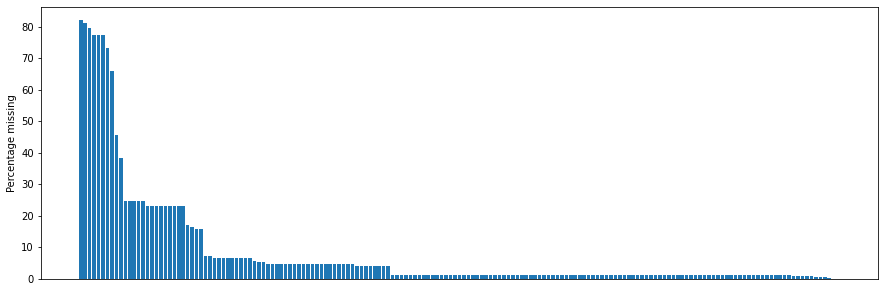

In [18]:
fig, ax = plt.subplots(figsize=(15,5))

missing = airpresistem_df.isna().sum().div(airpresistem_df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

To continue cleaning the data set, a graph was plotted showing the percentage of missing values per column. The ideal way to do a thorough analysis of data is that we do not have missing values, but in order to reduce our date and simplify the analysis, we will remove the columns that are less filled.

In [19]:
cols_missing = missing[missing[0]>50]
print("There are {} columns with NaNs above 50%.".format(len(cols_missing)))

There are 8 columns with NaNs above 50%.


The columns that will be considered for analysis will be those that are more than 50% filled. For this the software told me how many columns has above 50% missing values

In [20]:
cols_to_drop = list(cols_missing.index)
cols_to_drop

['br_000',
 'bq_000',
 'bp_000',
 'bo_000',
 'ab_000',
 'cr_000',
 'bn_000',
 'bm_000']

In order to identify which columns are less than 50% filled, I used the list() function to list which columns are less than 50% complete.

In [21]:
airpresistem_df = airpresistem_df.dropna(thresh=len(airpresistem_df)*.5, axis='columns')

Continuing the process of cleaning the data set, the drop function was used in order to delete all columns with more than 50% missing values.

In [22]:
airpresistem_df.median()

aa_000    30776.0
ac_000      152.0
ad_000      126.0
ae_000        0.0
af_000        0.0
           ...   
ee_007    41098.0
ee_008     3812.0
ee_009        0.0
ef_000        0.0
eg_000        0.0
Length: 162, dtype: float64

Median is the central value of the set, or if it is an odd number, is the mean of the two central numbers. 

In [23]:
print(airpresistem_df.isnull().values.any())

True


In [24]:
airpresistem_df.fillna(airpresistem_df.median(), inplace=True)

I used the .fillna() function to replace all missing values from the data set with the median. The median does not suffer interference from outliers, so I chose this Central tendency measure to replace the missing values in the dataset.

In [25]:
airpresistem_df.head(5) 

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


C:\Users\bia_l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'neg:59000 / pos:1000')

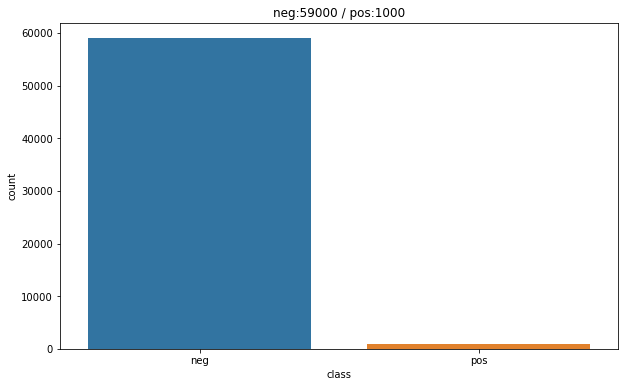

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(airpresistem_df["class"])
plt.title("neg:{0} / pos:{1}".format(airpresistem_df["class"].value_counts()[0], airpresistem_df["class"].value_counts()[1]))

The chart above shows that the amount of failures given for Air Pressure system reasons is only 1000 and that 59000 are given for other unknown reasons. The analysis of this is that less than 2% of truck failures are caused by the air pressure system.

In [27]:
airpresistem_df.head(10)

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14,6.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204,1.820000e+02,126.0,0.0,0.0,0.0,0.0,0.0,11804.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [28]:
airpresistem_df.count() 

class     60000
aa_000    60000
ac_000    60000
ad_000    60000
ae_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 163, dtype: int64

After replacing by the median, to check if there were 60,000 entries for all columns was used the count() function which confirmed that there were no more missing values in the data set.

## Checking outliers

C:\Users\bia_l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


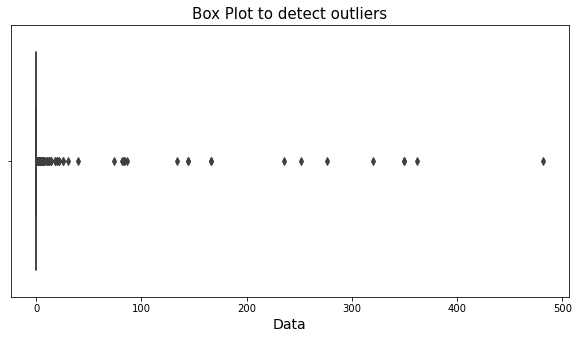

In [29]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(airpresistem_df["ef_000"])
plt.title('Box Plot to detect outliers', fontsize=15)
plt.xlabel('Data', fontsize=14)
plt.show()


Outliers are defined as observations in a sample, that is far from the main body or group that it is a part of. Measuring the distance between a data point and the center of all data points is used as a metodology to determine an outlier. I printed the boxplot of a numerical column of the data set, to make it clear that there is the presence of ouliers in the dataset. Any point before Q1 or after Q3 is considered a very different from the other. 

In [30]:
Q1 = airpresistem_df.quantile(0.25)
Q3 = airpresistem_df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

aa_000     47834.0
ac_000       828.0
ad_000       250.0
ae_000         0.0
af_000         0.0
            ...   
ee_007    166228.5
ee_008    136725.5
ee_009      1934.0
ef_000         0.0
eg_000         0.0
Length: 162, dtype: float64


Quartile range is a useful method because these statistics are less sensitive to outliers than if we use the mean to find the outliers of the dataset.  The upper represent values more than 75th percentiles Q3. The lower fences represent values less than 25th percentiles Q1. The interquartile range is the difference between the first and the third quartiles. Any value inside of the interquartile follow an acceptable variation.


In [31]:
airpresistem_df = airpresistem_df[~((airpresistem_df < (Q1-1.5 * IQR)) |(airpresistem_df > (Q3 + 1.5 * IQR))).any(axis = 1)]

For the treatment of outliers from the data set, the removal of these was used. The method was chosen because one made that the date set is about real data of a truck, and as in real life there can be many complications, such as way of driving each driver, weather conditions, speed of the road. So, the command given to python was that it removed any value below Q1 and any value above Q3.

In [32]:
airpresistem_df.shape

(2730, 163)

After cutting the ouliers from the dataset, the new amount of rows is 2730. This shows that the cleaning strategy of the data set has been validated, because now we deal with less variable(163) and fewer rows.

## Changing scale

In [33]:
from numpy import count_nonzero

sparsity = 1.0 - count_nonzero(airpresistem_df) / airpresistem_df.size
print(sparsity)

0.4193217825119666


The data set we are analyzing has approximately 34% of zero values, so it is not a sparse matrix. A matrix sparse is a matrix that is comprised of mostly zero values. On some date sets, the number zero has a value of no, while the number 1 has a value yes. The date should be normalize if zero means no, and variance 1 means yes. In view of that was described the date set may not undergo the normalization l2, but may have its scale changed in order to reduce the differences between the values.

In [34]:
x = airpresistem_df.drop(["class"], axis=1)
airpresistem_df.head(5)

y = airpresistem_df["class"]

The variables here can be classified as independent and dependent variables. The independent variables are used to determine the dependent variable. 
All data entry in the process is used to classify whether or not failures in the components are APS-related. If yes, a variation that changes is a class to positive, if it is not related to APS, the class changes for negative. This means that the collected data interferes with whether the class is positive or negative. Therefore, it is correct to state that the class is the variable dependent on all other variables of the dataset.

In [35]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
airpresistem_df = pd.DataFrame(x_scaled)

The purpose of normalization is to change the values of the numeric columns in the dataset to a common scale, without distorting the differences in the value ranges.The fact that the difference in data set values is too large requires the need to apply data normalization. For this, two types of Min-Max Scaling standardisation can be used 
or Standardization. The Min-Max Scaling linearly resizes each feature in the range [0,1]. This is done by changing the values of each resource so that the minimum value is 0 and then dividing by the new maximum value (which is the difference between the original maximum and minimum values).  Feature standardization is defined as: scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1. If the original feature has a Gaussian distribution, then the scaled feature does too. In this project was used the min and max scale. This method was applied, because the difference between the data in the dataset is large.

In [36]:
airpresistem_df.values

array([[1.52101536e-04, 1.70798898e-01, 2.24199288e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.09866320e-01, 2.09366391e-01, 2.24199288e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.86146930e-03, 6.06060606e-02, 6.04982206e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.06978080e-02, 1.18457300e-01, 1.35231317e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.35201366e-04, 2.75482094e-02, 3.55871886e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.70402731e-04, 0.00000000e+00, 2.24199288e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

When presenting the data values after applying the min max scale, it was possible to perceive the significant reduction in the scale of the data set.

## PCA

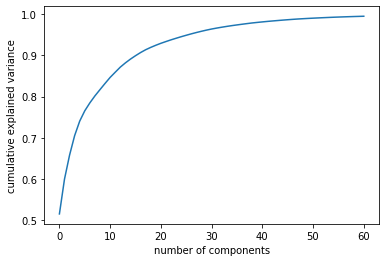

In [37]:
pca = PCA(0.995)
pca.fit(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

Principal component analysis (PCA) is often applied for data analysis in a variety of areas. The basics principles underlying the PCA, data standardization, possible visualizations of the results of the PCA. Then, the potential use of PCA for dimensionality reduction is illustrated across multiple real-world datasets. Finally, I summing up approaches related to PCA and other dimensionality reduction techniques.

Notice the code above has 99,5% for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 99,5% of the variance is retained. I can realize that, by the small variation of the components,  the columns have no outliers.

In [38]:
print (pca.n_components_)

61


After applying the PCA I wondered how many columns my dataset was reduced. That is, how many columns had variation less than 99.5% of the implanted data. Using the print() function appeared the number of columns after the PCA application.

In [39]:
pca = PCA(69)
projected = pca.fit_transform(x_scaled)

In [40]:
projected.shape

(2730, 69)

The shape function shows that the data set contains 60000 rows and only 69 columns for continuation of the analysis. This makes it clear that the objective of the applied PCA has been achieved

In [41]:
air_pca = pd.DataFrame(projected)
print (air_pca)

            0         1         2         3         4         5         6   \
0    -0.242577 -0.581412 -0.224134 -0.234847 -0.028520 -0.241380  0.558640   
1     3.238162 -0.079473  0.238947 -0.078479  0.103856  0.092254 -0.067623   
2    -0.200711 -0.236904  0.213729  0.423384 -0.154607  0.166772  0.014999   
3    -0.113782  0.294736 -0.476082  0.062348  0.087906 -0.240392  0.358013   
4    -0.101156  0.358305 -0.023247  0.280273  0.045735  0.008444 -0.031844   
...        ...       ...       ...       ...       ...       ...       ...   
2725 -0.393592 -0.166585  0.311069  0.323042 -0.092227  0.144665 -0.069559   
2726  0.009092  0.091628 -0.245521  0.670419  0.009498 -0.351547  0.207022   
2727 -0.288727  0.338639 -0.013723  0.278484  0.005582  0.076017  0.063435   
2728 -0.238892  0.143675  0.094762 -0.129232  0.132504 -0.025706  0.172028   
2729 -0.194231 -0.522916 -0.345680 -0.101399  0.104841  0.044977  0.163775   

            7         8         9   ...        59        60    

After performing the PCA I printed the columns that was selected as a main variables. These columns further influence the result seen in the variable class, which represents whether or not the ABS system has responsibility for failures. 

## Conclusion

The initial dataset size was 60,000 rows and 171 columns. Although the missing values were not detected, it was clear by viewing the dataset that they existed. However, the fact that these were called "na" was included in the software as a categorical data. This made the python understand that all columns that had missing values were taken as categorical. In order to fix this error, it was necessary for the python to understand that all entries filled as "na" were missing values. So the python understood that the numerical variables were indeed quantitative. To start clearing the dataset, I then checked which columns had missing values the most. Eight columns were identified and then they were dropped. Reducing to 163 the number of variables of the date set. After that it was the turn to replace the missing values. The substitute chosen was the median, which are less affected by the outliers. From the amount of result in the variable class as positive it was possible to verify that less than 2% of the accidents are caused by the air pressure system. It was verified through the boxplot that the system had outliers. The method chosen to know what were the values considered outliers was the quartile. The values outside the interquartale were disregarded, reducing the dataset to 2730 rows. Because the dataset has a range with large differences in values it was convinient to change the scale. Min and max scale was used for this. Because it is one, it was not possible to use the l2 standardisation. The new dataset array now contains only values between 0 and 1. The PCA was applied to reduce the dataset leaving the main independent variables that influenced the variable dependent "class". Only 69 variables effectively affect the variable "class", this number can be different depending on the data cleaning tha was applied. After all, the whole objective of the analysis is to understand what is actually causing the failures in the trucks, how responsible is the air pressure system for failures, so that the company effectively act in the cause of the failures solving the problem through its actions. 

## References

[1]Alam, M. (2021). Seaborn can do the job, then why Matplotlib? [online] Medium. Available at: https://towardsdatascience.com/seaborn-can-do-the-job-then-why-matplotlib-dac8d2d24a5f.

[2]Amrutkar, C. (2019). Independent and Dependent Variables (#1). [online] Machine Learner. Available at: https://medium.com/machine-learner/independent-and-dependent-variables-1-10d8553ad616 [Accessed 2 Apr. 2022].

[3]Anthony, F 2015, Mastering Pandas, Community Experience Distilled, Packt Publishing, Birmingham, UK, viewed 2 April 2022, <https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1017584&site=eds-live>.[1-2; 135-137]
cscheid.net. (n.d.). Regularization. [online] Available at: https://cscheid.net/writing/data_science/regularization/index.html [Accessed 2 Apr. 2022].

[4]GeeksforGeeks. (2020). Difference Between Matplotlib VS Seaborn. [online] Available at: https://www.geeksforgeeks.org/difference-between-matplotlib-vs-seaborn/.
knowledge Transfer. (2020). How to Normalize(Scale, Standardize) Pandas DataFrame columns using Scikit-Learn? [online] Available at: https://androidkt.com/how-to-normalize-scale-standardize-pandas-dataframe-columns-using-scikit-learn/?msclkid=f30c39beb07511ec84b4a29fa7624555 [Accessed 2 Apr. 2022].

[5]Loukas, S. (2020). Everything you need to know about Min-Max normalization in Python. [online] Medium. Available at: https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79.

[6]Neth, H. (n.d.). 4.2 Essentials of EDA | Data Science for Psychologists. [online] bookdown.org. Available at: https://bookdown.org/hneth/ds4psy/4-2-EDA-essentials.html [Accessed 2 Apr. 2022].

[7]Paiva, C. (2019). Porquê e Quando é Necessário Normalizar os Dados. [online] Estudante-C. Available at: https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa [Accessed 2 Apr. 2022].

[8]Squire, M. (2015) Clean Data. Birmingham, UK: Packt Publishing (Community Experience Distilled). Available at: https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=996715&site=eds-live (Accessed: 2 April 2022).
Waskom, M. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), p.3021.

[9]Zach (2021). When to Use Mean vs. Median (With Examples). [online] Statology. Available at: https://www.statology.org/when-to-use-mean-vs-median/?msclkid=5c1fffaab04511eca994b0a4009e288c [Accessed 2 Apr. 2022].
